In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('travel insurance.csv')
insurance_copy = insurance

In [3]:
pd.options.display.max_columns = None

In [4]:
insurance

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [6]:
insurance.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [7]:
columns_to_drop = ['Net Sales', 'Gender']
insurance = insurance.drop(columns=columns_to_drop)

In [8]:
insurance.rename(columns={'Commision (in value)': 'Commission'}, inplace=True)

In [9]:
insurance['Commission'] = insurance['Commission'].astype('int64')

In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Agency                63326 non-null  object
 1   Agency Type           63326 non-null  object
 2   Distribution Channel  63326 non-null  object
 3   Product Name          63326 non-null  object
 4   Claim                 63326 non-null  object
 5   Duration              63326 non-null  int64 
 6   Destination           63326 non-null  object
 7   Commission            63326 non-null  int64 
 8   Age                   63326 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.3+ MB


In [11]:
insurance.nunique()

Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             26
Claim                     2
Duration                455
Destination             149
Commission              139
Age                      89
dtype: int64

In [12]:
insurance['Claim'] = np.where(insurance['Claim'].isin(['Yes']), 0, 1)

In [13]:
insurance['Claim'].nunique()

2

In [15]:
insurance = insurance[insurance['Duration'] > 0]
insurance = insurance[insurance['Age'] > 0]

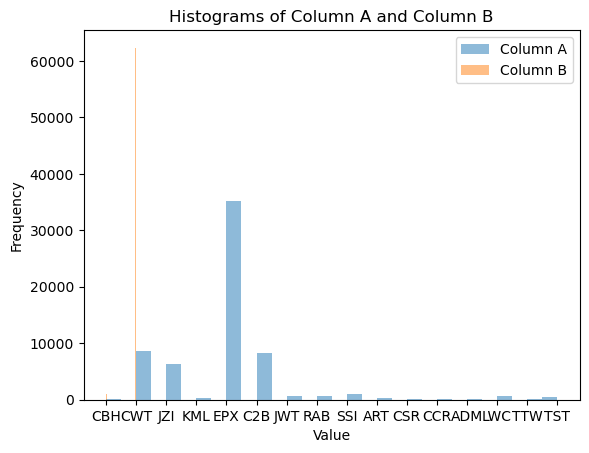

In [16]:
plt.hist(insurance['Agency'], bins=30, alpha=0.5, label='Column A')
plt.hist(insurance['Claim'], bins=30, alpha=0.5, label='Column B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Column A and Column B')
plt.legend()
plt.show()

In [17]:
def transform_agency(value):
    if value in ['EPX', 'CWT', 'JZI', 'C2B']:
        return value
    else:
        return 'Others'

# Apply the function to the 'Agency' column
insurance['Agency'] = insurance['Agency'].apply(transform_agency)
insurance['Agency'].unique()

array(['Others', 'CWT', 'JZI', 'EPX', 'C2B'], dtype=object)

In [19]:
pd.options.display.max_rows = 10
insurance['Destination'].value_counts()

SINGAPORE                 13236
MALAYSIA                   5927
THAILAND                   5888
CHINA                      4794
AUSTRALIA                  3694
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 149, dtype: int64

In [20]:
def transform_agency(value):
    if value in ['SINGAPORE', 'MALAYSIA', 'THAILAND','CHINA','AUSTRALIA']:
        return value
    else:
        return 'Others'

# Apply the function to the 'Agency' column
insurance['Destination'] = insurance['Destination'].apply(transform_agency)
insurance['Destination'].unique()

array(['MALAYSIA', 'AUSTRALIA', 'Others', 'THAILAND', 'SINGAPORE',
       'CHINA'], dtype=object)

In [21]:
pd.options.display.max_rows = 10
insurance['Product Name'].value_counts()

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8578
Basic Plan                               5452
Bronze Plan                              4046
                                        ...  
Single Trip Travel Protect Platinum        73
Annual Travel Protect Platinum             53
Spouse or Parents Comprehensive Plan       15
Child Comprehensive Plan                    9
Travel Cruise Protect Family                1
Name: Product Name, Length: 26, dtype: int64

In [22]:
def transform_agency(value):
    if value in ['Cancellation Plan', '2 way Comprehensive Plan', 'Rental Vehicle Excess Insurance','Basic Plan','Bronze Plan']:
        return value
    else:
        return 'Others'

# Apply the function to the 'Agency' column
insurance['Product Name'] = insurance['Product Name'].apply(transform_agency)
insurance['Product Name'].unique()

array(['Others', 'Rental Vehicle Excess Insurance', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan', 'Cancellation Plan'],
      dtype=object)

In [23]:
column_range_array = np.array([insurance['Duration'].min(), insurance['Duration'].max()])
column_range_array

array([   1, 4881])

In [24]:
insurance['Duration']=insurance_copy['Duration']
insurance['Duration'].value_counts()

6       2115
5       2095
7       1970
8       1958
4       1931
        ... 
4652       1
465        1
301        1
478        1
488        1
Name: Duration, Length: 452, dtype: int64

In [25]:
bins_ins= [0,200,500,1000,5000]
labels_ins = ['Short','Medium','Long','Very long']
insurance['Duration']=pd.cut(insurance['Duration'],bins=bins_ins,labels=labels_ins)
insurance['Duration'].value_counts()

Short        60299
Medium        2935
Very long       14
Long            10
Name: Duration, dtype: int64

In [26]:
column_range_array = np.array([insurance['Commission'].min(), insurance['Commission'].max()])
column_range_array

array([  0, 283])

In [27]:
bins_ins= [-1,50,100,150,200,300]
labels_ins = ['Upto 50','Upto 100','Upto 150','Upto 200','Upto 300']
insurance['Commission']=pd.cut(insurance['Commission'],bins=bins_ins,labels=labels_ins)
insurance['Commission'].value_counts()

Upto 50     60090
Upto 100     2759
Upto 150      245
Upto 200      105
Upto 300       59
Name: Commission, dtype: int64

In [28]:
insurance['Commission'].dtype

CategoricalDtype(categories=['Upto 50', 'Upto 100', 'Upto 150', 'Upto 200', 'Upto 300'], ordered=True)

In [29]:
insurance['Age']=insurance_copy['Age']

In [30]:
column_range_array = np.array([insurance['Age'].min(), insurance['Age'].max()])
column_range_array

array([  1, 118])

In [31]:
bins_ins= [0,35,75,200]
labels_ins = ['Young','Middle Age','Old']
insurance['Age']=pd.cut(insurance['Age'],bins=bins_ins,labels=labels_ins)
insurance['Age'].value_counts()

Middle Age    44716
Young         17331
Old            1211
Name: Age, dtype: int64

In [32]:
insurance.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Commission              0
Age                     0
dtype: int64

In [33]:
insurance.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Commission              0
Age                     0
dtype: int64

In [34]:
insurance

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Commission,Age
0,Others,Travel Agency,Offline,Others,1,Short,MALAYSIA,Upto 50,Old
1,Others,Travel Agency,Offline,Others,1,Short,MALAYSIA,Upto 50,Middle Age
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,Short,AUSTRALIA,Upto 50,Young
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,Short,AUSTRALIA,Upto 50,Young
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,Short,Others,Upto 50,Middle Age
...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,1,Short,Others,Upto 50,Young
63322,JZI,Airlines,Online,Basic Plan,1,Short,CHINA,Upto 50,Middle Age
63323,JZI,Airlines,Online,Basic Plan,1,Short,MALAYSIA,Upto 50,Middle Age
63324,JZI,Airlines,Online,Basic Plan,1,Short,Others,Upto 50,Middle Age


In [35]:
insurance_dummies=[pd.get_dummies(insurance['Agency'],prefix='Agency',prefix_sep=':'),
pd.get_dummies(insurance['Agency Type'],prefix='Agency Type',prefix_sep=':'),
pd.get_dummies(insurance['Distribution Channel'],prefix='Agency',prefix_sep=':'),
pd.get_dummies(insurance['Product Name'],prefix='Product Name',prefix_sep=':'),
pd.get_dummies(insurance['Duration'],prefix='Duration',prefix_sep=':'),
pd.get_dummies(insurance['Destination'],prefix='Destination',prefix_sep=':'),
pd.get_dummies(insurance['Commission'],prefix='Commission',prefix_sep=':'),
pd.get_dummies(insurance['Age'],prefix='Age',prefix_sep=':')]
insurance_dummies=pd.concat(insurance_dummies,axis=1)
insurance=pd.concat([insurance,insurance_dummies],axis=1)
insurance

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Commission,Age,Agency:C2B,Agency:CWT,Agency:EPX,Agency:JZI,Agency:Others,Agency Type:Airlines,Agency Type:Travel Agency,Agency:Offline,Agency:Online,Product Name:2 way Comprehensive Plan,Product Name:Basic Plan,Product Name:Bronze Plan,Product Name:Cancellation Plan,Product Name:Others,Product Name:Rental Vehicle Excess Insurance,Duration:Short,Duration:Medium,Duration:Long,Duration:Very long,Destination:AUSTRALIA,Destination:CHINA,Destination:MALAYSIA,Destination:Others,Destination:SINGAPORE,Destination:THAILAND,Commission:Upto 50,Commission:Upto 100,Commission:Upto 150,Commission:Upto 200,Commission:Upto 300,Age:Young,Age:Middle Age,Age:Old
0,Others,Travel Agency,Offline,Others,1,Short,MALAYSIA,Upto 50,Old,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,Others,Travel Agency,Offline,Others,1,Short,MALAYSIA,Upto 50,Middle Age,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,Short,AUSTRALIA,Upto 50,Young,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,Short,AUSTRALIA,Upto 50,Young,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,1,Short,Others,Upto 50,Middle Age,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,1,Short,Others,Upto 50,Young,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
63322,JZI,Airlines,Online,Basic Plan,1,Short,CHINA,Upto 50,Middle Age,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
63323,JZI,Airlines,Online,Basic Plan,1,Short,MALAYSIA,Upto 50,Middle Age,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
63324,JZI,Airlines,Online,Basic Plan,1,Short,Others,Upto 50,Middle Age,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split
train_test_split(insurance.drop('Claim', axis = 1), insurance['Claim'])
insurance_inputs_train, insurance_inputs_test, insurance_target_train, insurance_target_test = train_test_split(insurance.drop('Claim', axis = 1), insurance['Claim'])

In [37]:
insurance_inputs_train.shape

(47443, 41)

In [38]:
insurance_inputs_test.shape

(15815, 41)

In [39]:
insurance_target_train.shape

(47443,)

In [40]:
insurance_target_test.shape

(15815,)

In [41]:
insurance_inputs=insurance_inputs_train
insurance_target=insurance_target_train
#insurance_inputs=insurance_inputs_test
#insurance_target=insurance_target_test

In [42]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [43]:
insurance_temp=woe_discrete(insurance_inputs,'Agency',insurance_target)
insurance_temp

,Agency,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,C2B,6253,0.932832,0.131800,5833.0,420.0,0.124842,0.583333,-1.541709,NaN,NaN,1.116118
1,Others,3746,0.985585,0.078958,3692.0,54.0,0.079019,0.075000,0.052199,0.052752,1.593908,1.116118
2,CWT,6412,0.990175,0.135152,6349.0,63.0,0.135886,0.087500,0.440177,0.004590,0.387978,1.116118
3,EPX,26302,0.994069,0.554392,26146.0,156.0,0.559596,0.216667,0.948855,0.003894,0.508678,1.116118
4,JZI,4730,0.994292,0.099699,4703.0,27.0,0.100657,0.037500,0.987378,0.000223,0.038524,1.116118


In [46]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

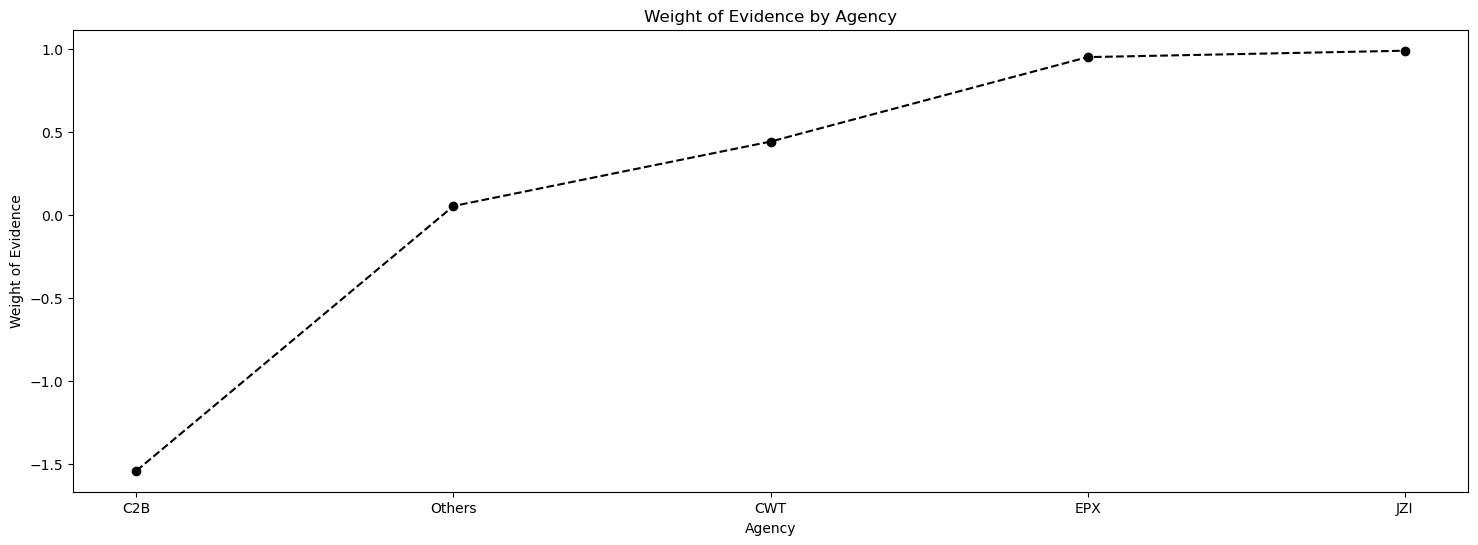

In [47]:
plot_by_woe(insurance_temp)

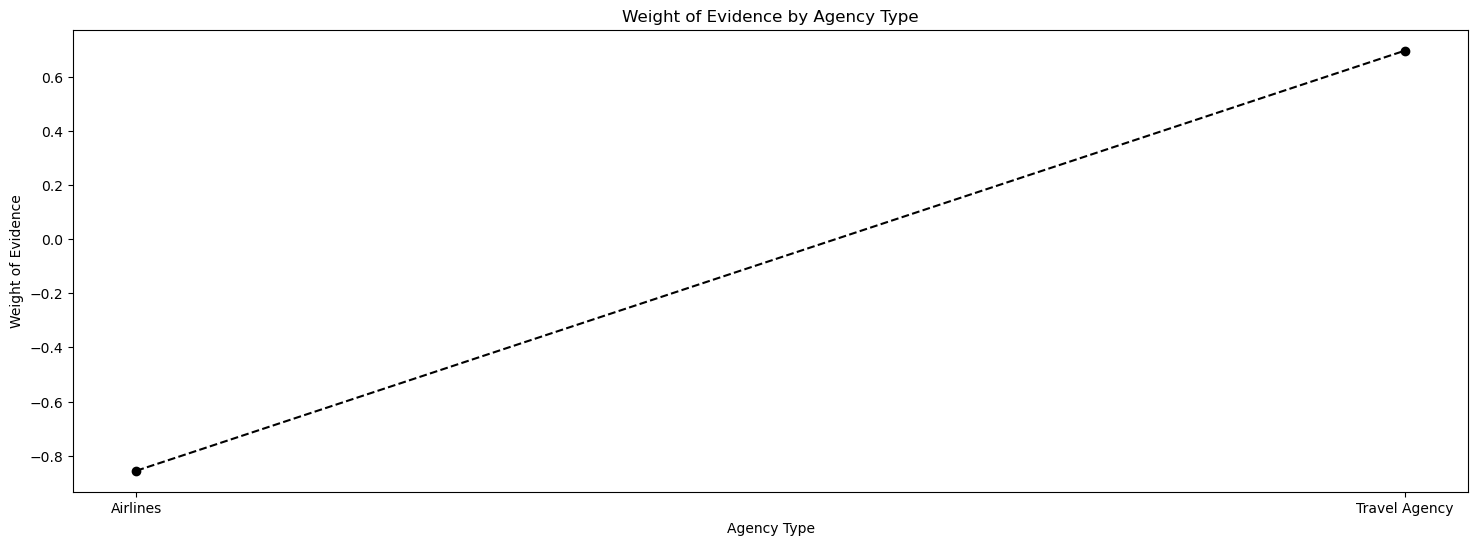

In [48]:
insurance_temp=woe_discrete(insurance_inputs,'Agency Type',insurance_target)
plot_by_woe(insurance_temp)

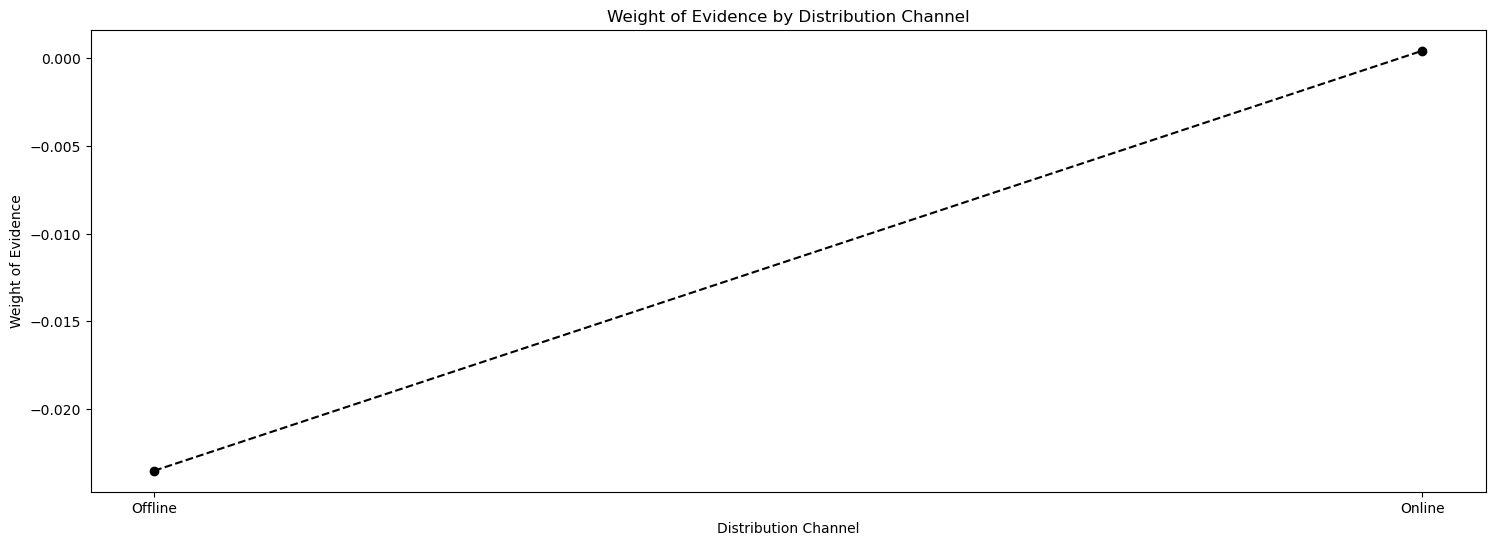

In [49]:
insurance_temp=woe_discrete(insurance_inputs,'Distribution Channel',insurance_target)
plot_by_woe(insurance_temp)

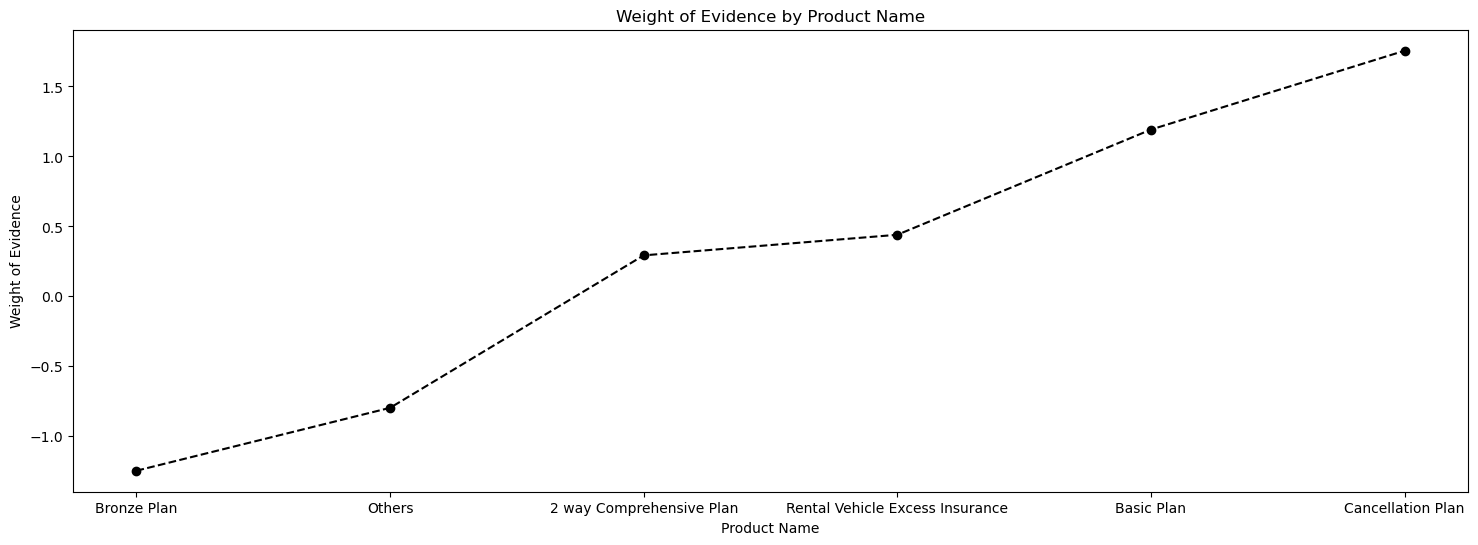

In [50]:
insurance_temp=woe_discrete(insurance_inputs,'Product Name',insurance_target)
plot_by_woe(insurance_temp)

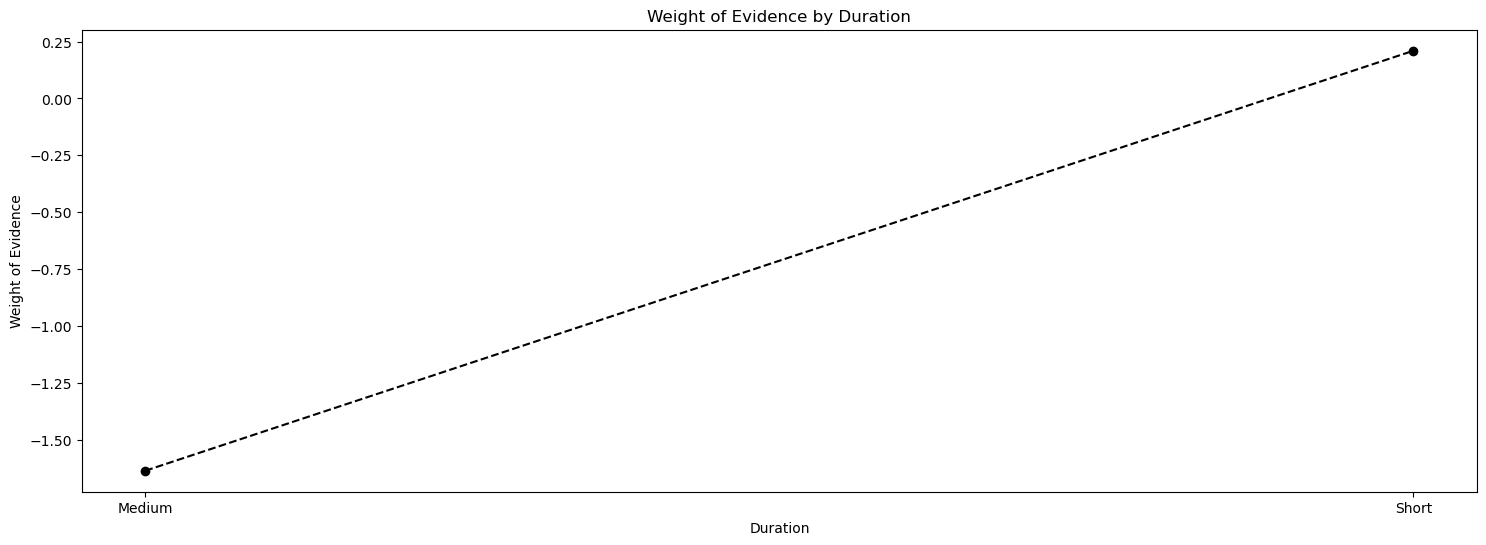

In [51]:
insurance_temp=woe_discrete(insurance_inputs,'Duration',insurance_target)
plot_by_woe(insurance_temp)

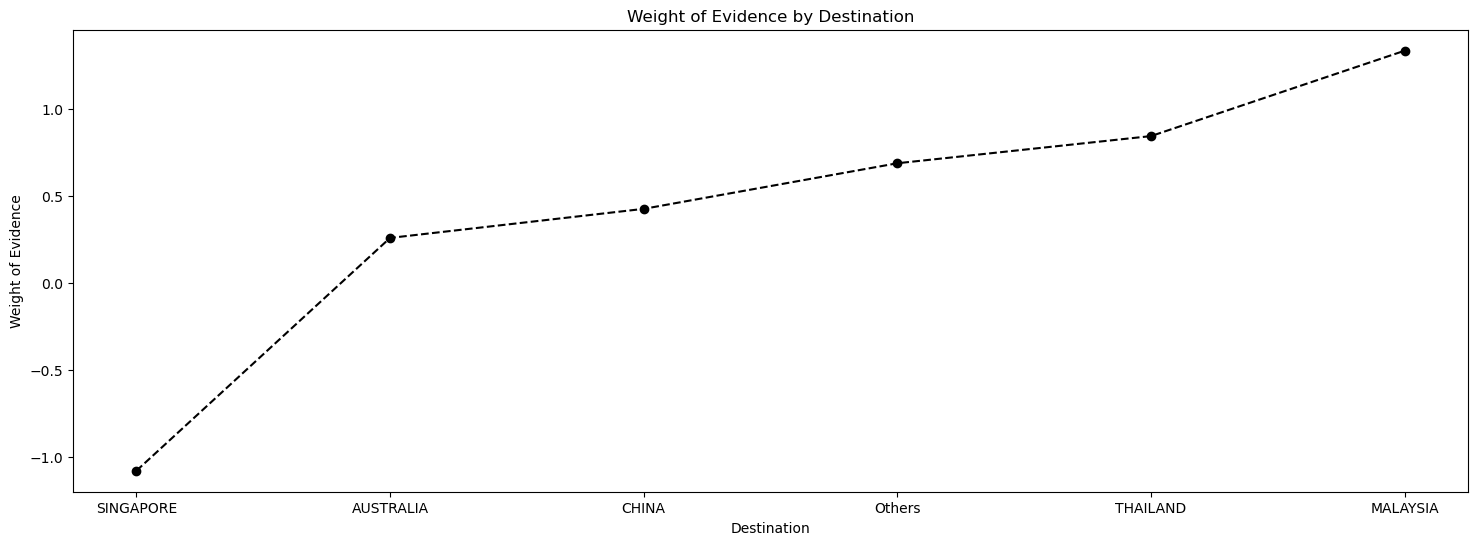

In [52]:
insurance_temp=woe_discrete(insurance_inputs,'Destination',insurance_target)
plot_by_woe(insurance_temp)

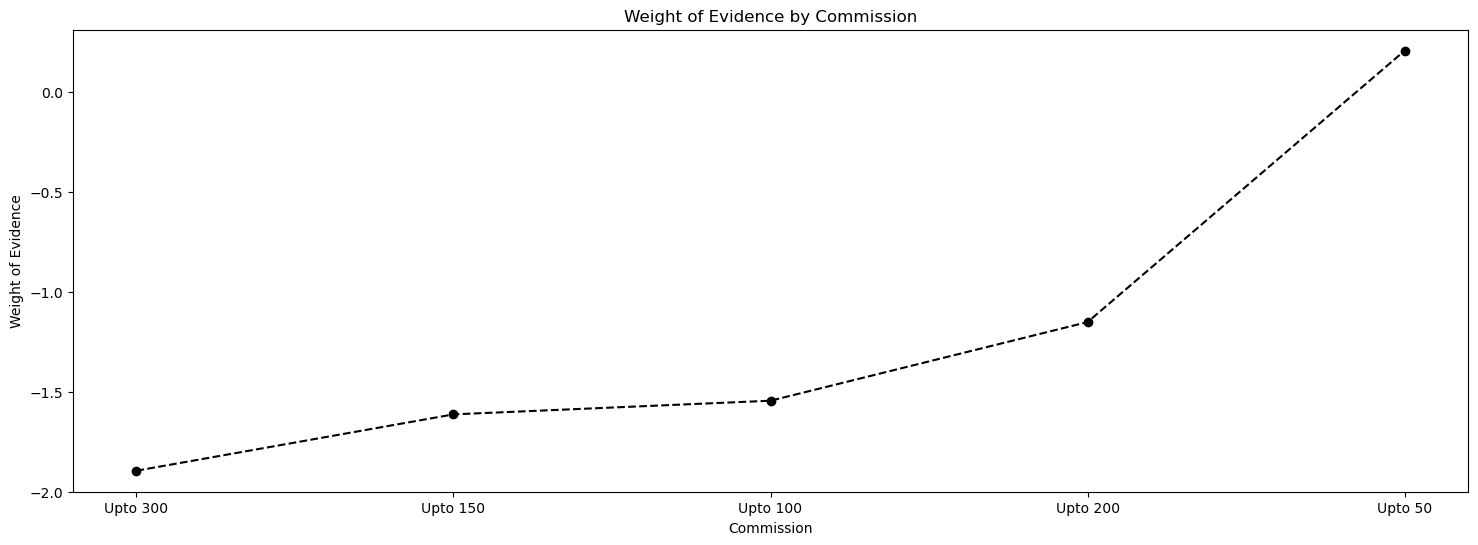

In [53]:
insurance_temp=woe_discrete(insurance_inputs,'Commission',insurance_target)
plot_by_woe(insurance_temp)

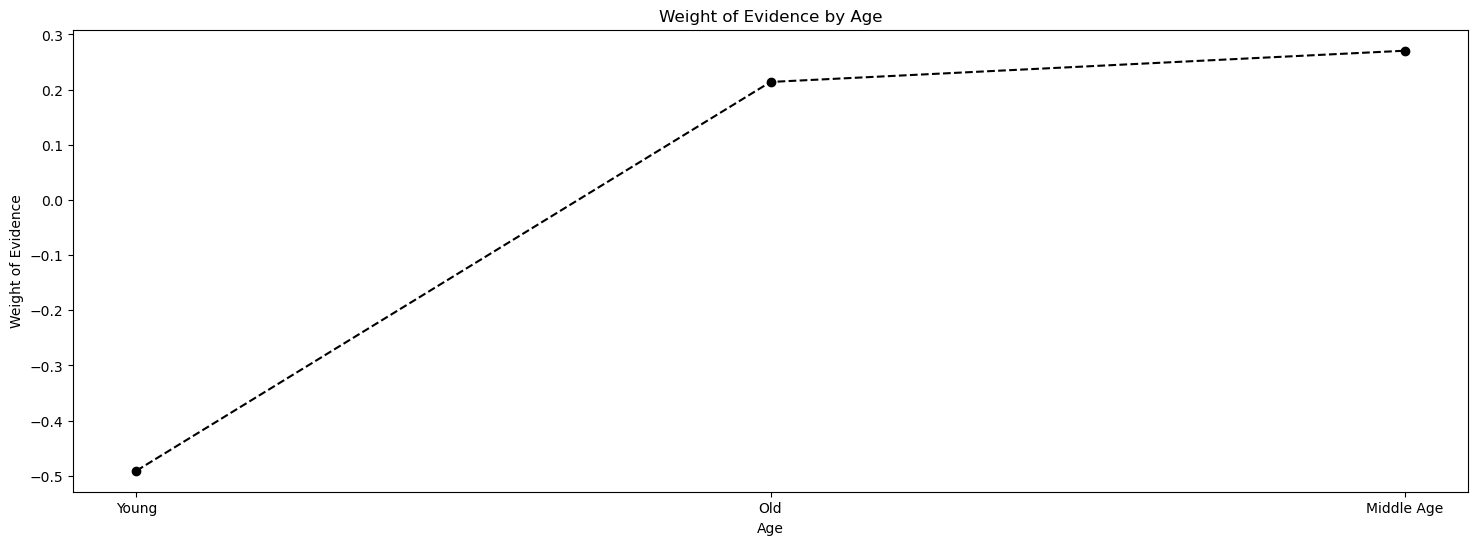

In [54]:
insurance_temp=woe_discrete(insurance_inputs,'Age',insurance_target)
plot_by_woe(insurance_temp)

In [55]:
insurance_inputs_train.to_csv('insurance_inputs_train.csv')
insurance_inputs_test.to_csv('insurance_inputs_test.csv')
insurance_target_train.to_csv('insurance_target_train.csv')
insurance_target_test.to_csv('insurance_target_test.csv')

# Insurance Claim Prediction Model

In [56]:
insurance_inputs_train=pd.read_csv('insurance_inputs_train.csv',index_col=0)
insurance_inputs_test=pd.read_csv('insurance_inputs_test.csv',index_col=0)
insurance_target_train=pd.read_csv('insurance_target_train.csv',index_col=0)
insurance_target_test=pd.read_csv('insurance_target_test.csv',index_col=0)

In [57]:
insurance_inputs_train.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Commission,Age,Agency:C2B,Agency:CWT,Agency:EPX,Agency:JZI,Agency:Others,Agency Type:Airlines,Agency Type:Travel Agency,Agency:Offline,Agency:Online,Product Name:2 way Comprehensive Plan,Product Name:Basic Plan,Product Name:Bronze Plan,Product Name:Cancellation Plan,Product Name:Others,Product Name:Rental Vehicle Excess Insurance,Duration:Short,Duration:Medium,Duration:Long,Duration:Very long,Destination:AUSTRALIA,Destination:CHINA,Destination:MALAYSIA,Destination:Others,Destination:SINGAPORE,Destination:THAILAND,Commission:Upto 50,Commission:Upto 100,Commission:Upto 150,Commission:Upto 200,Commission:Upto 300,Age:Young,Age:Middle Age,Age:Old
5020,EPX,Travel Agency,Online,Cancellation Plan,Short,MALAYSIA,Upto 50,Middle Age,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
53512,EPX,Travel Agency,Online,Others,Short,Others,Upto 50,Young,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
9716,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Short,Others,Upto 50,Young,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1753,JZI,Airlines,Online,Basic Plan,Short,THAILAND,Upto 50,Young,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
22229,EPX,Travel Agency,Online,2 way Comprehensive Plan,Short,Others,Upto 50,Middle Age,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [58]:
insurance_target_train.head()

,Claim
5020,1
53512,1
9716,1
1753,1
22229,1


In [60]:
ref_cat=insurance_inputs_train.loc[:,['Agency:C2B',
'Agency Type:Airlines',
'Product Name:Bronze Plan',
'Duration:Medium',
'Destination:SINGAPORE',
'Commission:Upto 300',
'Age:Young']]

In [62]:
inputs_train_with_refcat=insurance_inputs_train.loc[:,['Agency:C2B',
'Agency:EPX',
'Agency:CWT',
'Agency:Others',
'Agency:JZI',
'Agency Type:Travel Agency',
'Agency Type:Airlines',
'Product Name:Cancellation Plan',
'Product Name:Basic Plan',
'Product Name:Rental Vehicle Excess Insurance',
'Product Name:2 way Comprehensive Plan',
'Product Name:Others',
'Product Name:Bronze Plan',
'Duration:Short',
'Duration:Medium',
'Destination:MALAYSIA',
'Destination:THAILAND',
'Destination:Others',
'Destination:CHINA',
'Destination:AUSTRALIA',
'Destination:SINGAPORE',
'Commission:Upto 50',
'Commission:Upto 150',
'Commission:Upto 200',
'Commission:Upto 100',
'Commission:Upto 300',
'Age:Old',
'Age:Middle Age',
'Age:Young']]

In [63]:
inputs_train = inputs_train_with_refcat.drop(ref_cat, axis = 1)

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [65]:
reg = LogisticRegression()


In [66]:
pd.options.display.max_rows = None

In [67]:
reg.fit(inputs_train, insurance_target_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,1.695356
1,Agency:EPX,3.397186
2,Agency:CWT,1.277140
3,Agency:Others,1.912862
4,Agency:JZI,1.594117
5,Agency Type:Travel Agency,-0.819476
6,Product Name:Cancellation Plan,0.321960
7,Product Name:Basic Plan,0.747654
8,Product Name:Rental Vehicle Excess Insurance,1.277140
9,Product Name:2 way Comprehensive Plan,-1.124882


## Estimation of p-values for better fit

In [69]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T, X) + np.eye(X.shape[1]) * 1e-6  # Add small identity matrix to avoid singularity
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

reg = LogisticRegression_with_p_values()

reg.fit(inputs_train, insurance_target_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.695356,NaN
1,Agency:EPX,3.397186,7.156053e-14
2,Agency:CWT,1.277140,9.985589e-01
3,Agency:Others,1.912862,3.851846e-10
4,Agency:JZI,1.594117,2.065983e-04
5,Agency Type:Travel Agency,-0.819476,1.171700e-02
6,Product Name:Cancellation Plan,0.321960,3.782435e-01
7,Product Name:Basic Plan,0.747654,7.957734e-02
8,Product Name:Rental Vehicle Excess Insurance,1.277140,9.985589e-01
9,Product Name:2 way Comprehensive Plan,-1.124882,1.056207e-03


In [71]:
inputs_train_with_refcat=insurance_inputs_train.loc[:,['Agency:C2B',
'Agency:EPX',
'Agency:CWT',
'Agency:Others',
'Agency:JZI',
'Agency Type:Travel Agency',
'Agency Type:Airlines',
'Product Name:Cancellation Plan',
'Product Name:Basic Plan',
'Product Name:Rental Vehicle Excess Insurance',
'Product Name:2 way Comprehensive Plan',
'Product Name:Others',
'Product Name:Bronze Plan',
'Duration:Short',
'Duration:Medium',
'Destination:MALAYSIA',
'Destination:THAILAND',
'Destination:Others',
'Destination:CHINA',
'Destination:AUSTRALIA',
'Destination:SINGAPORE',
'Commission:Upto 50',
'Commission:Upto 150',
'Commission:Upto 200',
'Commission:Upto 100',
'Commission:Upto 300',
'Age:Old',
'Age:Middle Age',
'Age:Young']]

ref_cat=insurance_inputs_train.loc[:,['Agency:C2B',
'Agency Type:Airlines',
'Product Name:Bronze Plan',
'Duration:Medium',
'Destination:SINGAPORE',
'Commission:Upto 300',
'Age:Young','Agency:CWT','Product Name:Cancellation Plan',
'Product Name:Basic Plan',
'Product Name:Rental Vehicle Excess Insurance',
'Product Name:2 way Comprehensive Plan',
'Product Name:Others',
'Product Name:Bronze Plan','Duration:Short',
'Duration:Medium',
'Destination:MALAYSIA',
'Destination:THAILAND',
'Destination:Others',
'Destination:CHINA',
'Destination:AUSTRALIA',
'Destination:SINGAPORE','Commission:Upto 150',
'Commission:Upto 200',
'Age:Old']]

In [72]:
inputs_train = inputs_train_with_refcat.drop(ref_cat, axis = 1)

In [76]:
reg2 = LogisticRegression_with_p_values()

reg2.fit(inputs_train, insurance_target_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,1.197529,NaN
1,Agency:EPX,0.663161,5.828048e-07
2,Agency:Others,0.921835,2.759022e-10
3,Agency:JZI,2.124420,2.655420e-27
4,Agency Type:Travel Agency,1.463257,2.047919e-41
5,Commission:Upto 50,1.671229,4.144755e-137
6,Commission:Upto 100,0.823117,1.285924e-16
7,Age:Middle Age,0.151663,5.788880e-02


## Model Testing

In [78]:
inputs_test_with_refcat=insurance_inputs_test.loc[:,['Agency:C2B',
'Agency:EPX',
'Agency:CWT',
'Agency:Others',
'Agency:JZI',
'Agency Type:Travel Agency',
'Agency Type:Airlines',
'Product Name:Cancellation Plan',
'Product Name:Basic Plan',
'Product Name:Rental Vehicle Excess Insurance',
'Product Name:2 way Comprehensive Plan',
'Product Name:Others',
'Product Name:Bronze Plan',
'Duration:Short',
'Duration:Medium',
'Destination:MALAYSIA',
'Destination:THAILAND',
'Destination:Others',
'Destination:CHINA',
'Destination:AUSTRALIA',
'Destination:SINGAPORE',
'Commission:Upto 50',
'Commission:Upto 150',
'Commission:Upto 200',
'Commission:Upto 100',
'Commission:Upto 300',
'Age:Old',
'Age:Middle Age',
'Age:Young']]

ref_cat=insurance_inputs_test.loc[:,['Agency:C2B',
'Agency Type:Airlines',
'Product Name:Bronze Plan',
'Duration:Medium',
'Destination:SINGAPORE',
'Commission:Upto 300',
'Age:Young','Agency:CWT','Product Name:Cancellation Plan',
'Product Name:Basic Plan',
'Product Name:Rental Vehicle Excess Insurance',
'Product Name:2 way Comprehensive Plan',
'Product Name:Others',
'Product Name:Bronze Plan','Duration:Short',
'Duration:Medium',
'Destination:MALAYSIA',
'Destination:THAILAND',
'Destination:Others',
'Destination:CHINA',
'Destination:AUSTRALIA',
'Destination:SINGAPORE','Commission:Upto 150',
'Commission:Upto 200',
'Age:Old']]

In [80]:
inputs_test = inputs_test_with_refcat.drop(ref_cat, axis = 1)
inputs_test.head()

,Agency:EPX,Agency:Others,Agency:JZI,Agency Type:Travel Agency,Commission:Upto 50,Commission:Upto 100,Age:Middle Age
47417,0,0,0,0,0,1,1
27615,0,0,0,1,1,0,1
6460,1,0,0,1,1,0,1
47519,1,0,0,1,1,0,1
41320,1,0,0,1,1,0,1


In [81]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba[:][:,1]
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.8977351 , 0.98883428, 0.99421589, ..., 0.95348821, 0.95348821,
       0.98883428])

In [83]:
insurance_target_test_temp = insurance_target_test
insurance_target_test_temp.reset_index(drop = True, inplace = True)

In [85]:
df_actual_predicted_probs = pd.concat([insurance_target_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.shape

(15815, 2)

In [87]:
df_actual_predicted_probs.columns = ['insurance_target_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = insurance_inputs_test.index
df_actual_predicted_probs.head()

,insurance_target_test,y_hat_test_proba
47417,1,0.897735
27615,1,0.988834
6460,1,0.994216
47519,1,0.994216
41320,1,0.994216


In [88]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [89]:
pd.crosstab(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,31,176
1,307,15301


In [91]:
pd.crosstab(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.001960,0.011129
1,0.019412,0.967499


In [93]:
(pd.crosstab(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.9694593740120139

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_curve(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test_proba'])
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test_proba'])


Text(0.5, 1.0, 'ROC curve')

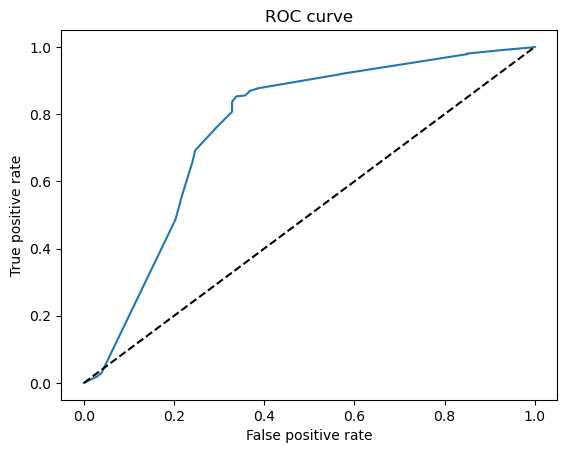

In [95]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [98]:
AUROC = roc_auc_score(df_actual_predicted_probs['insurance_target_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7588813924235558

# Application of Insurance Claim Prediction Model

In [99]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.197529,NaN
1,Agency:EPX,0.663161,5.828048e-07
2,Agency:Others,0.921835,2.759022e-10
3,Agency:JZI,2.124420,2.655420e-27
4,Agency Type:Travel Agency,1.463257,2.047919e-41
5,Commission:Upto 50,1.671229,4.144755e-137
6,Commission:Upto 100,0.823117,1.285924e-16
7,Age:Middle Age,0.151663,5.788880e-02


In [103]:
ref_categories = ['Agency:C2B',
'Agency Type:Airlines',
'Product Name:Bronze Plan',
'Duration:Medium',
'Destination:SINGAPORE',
'Commission:Upto 300',
'Age:Young','Agency:CWT','Product Name:Cancellation Plan',
'Product Name:Basic Plan',
'Product Name:Rental Vehicle Excess Insurance',
'Product Name:2 way Comprehensive Plan',
'Product Name:Others',
'Product Name:Bronze Plan','Duration:Short',
'Duration:Medium',
'Destination:MALAYSIA',
'Destination:THAILAND',
'Destination:Others',
'Destination:CHINA',
'Destination:AUSTRALIA',
'Destination:SINGAPORE','Commission:Upto 150',
'Commission:Upto 200',
'Age:Old']

In [105]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,Agency:C2B,0,NaN
1,Agency Type:Airlines,0,NaN
2,Product Name:Bronze Plan,0,NaN
3,Duration:Medium,0,NaN
4,Destination:SINGAPORE,0,NaN
5,Commission:Upto 300,0,NaN
6,Age:Young,0,NaN
7,Agency:CWT,0,NaN
8,Product Name:Cancellation Plan,0,NaN
9,Product Name:Basic Plan,0,NaN


In [106]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,1.197529,NaN
1,1,Agency:EPX,0.663161,5.828048e-07
2,2,Agency:Others,0.921835,2.759022e-10
3,3,Agency:JZI,2.124420,2.655420e-27
4,4,Agency Type:Travel Agency,1.463257,2.047919e-41
5,5,Commission:Upto 50,1.671229,4.144755e-137
6,6,Commission:Upto 100,0.823117,1.285924e-16
7,7,Age:Middle Age,0.151663,5.788880e-02
8,0,Agency:C2B,0.000000,NaN
9,1,Agency Type:Airlines,0.000000,NaN


In [107]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,1.197529,NaN,Intercept
1,1,Agency:EPX,0.663161,5.828048e-07,Agency
2,2,Agency:Others,0.921835,2.759022e-10,Agency
3,3,Agency:JZI,2.124420,2.655420e-27,Agency
4,4,Agency Type:Travel Agency,1.463257,2.047919e-41,Agency Type
5,5,Commission:Upto 50,1.671229,4.144755e-137,Commission
6,6,Commission:Upto 100,0.823117,1.285924e-16,Commission
7,7,Age:Middle Age,0.151663,5.788880e-02,Age
8,0,Agency:C2B,0.000000,NaN,Agency
9,1,Agency Type:Airlines,0.000000,NaN,Agency Type


In [108]:
min_score = 0
max_score = 100

In [109]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Age             0.000000
Agency          0.000000
Agency Type     0.000000
Commission      0.000000
Destination     0.000000
Duration        0.000000
Intercept       1.197529
Product Name    0.000000
Name: Coefficients, dtype: float64

In [110]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

1.1975288620813307

In [111]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Age             0.151663
Agency          2.124420
Agency Type     1.463257
Commission      1.671229
Destination     0.000000
Duration        0.000000
Intercept       1.197529
Product Name    0.000000
Name: Coefficients, dtype: float64

In [112]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

6.608098239419974

In [113]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.197529,NaN,Intercept,22.133139
1,1,Agency:EPX,0.663161,5.828048e-07,Agency,12.256771
2,2,Agency:Others,0.921835,2.759022e-10,Agency,17.037674
3,3,Agency:JZI,2.124420,2.655420e-27,Agency,39.264260
4,4,Agency Type:Travel Agency,1.463257,2.047919e-41,Agency Type,27.044416
5,5,Commission:Upto 50,1.671229,4.144755e-137,Commission,30.888235
6,6,Commission:Upto 100,0.823117,1.285924e-16,Commission,15.213124
7,7,Age:Middle Age,0.151663,5.788880e-02,Age,2.803089
8,0,Agency:C2B,0.000000,NaN,Agency,0.000000
9,1,Agency Type:Airlines,0.000000,NaN,Agency Type,0.000000


In [114]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

C:\Users\sabha\AppData\Local\Temp\ipykernel_5116\1410049194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.197529,NaN,Intercept,0.000000
1,1,Agency:EPX,0.663161,5.828048e-07,Agency,12.256771
2,2,Agency:Others,0.921835,2.759022e-10,Agency,17.037674
3,3,Agency:JZI,2.124420,2.655420e-27,Agency,39.264260
4,4,Agency Type:Travel Agency,1.463257,2.047919e-41,Agency Type,27.044416
5,5,Commission:Upto 50,1.671229,4.144755e-137,Commission,30.888235
6,6,Commission:Upto 100,0.823117,1.285924e-16,Commission,15.213124
7,7,Age:Middle Age,0.151663,5.788880e-02,Age,2.803089
8,0,Agency:C2B,0.000000,NaN,Agency,0.000000
9,1,Agency Type:Airlines,0.000000,NaN,Agency Type,0.000000


In [115]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.197529,NaN,Intercept,0.000000,0.0
1,1,Agency:EPX,0.663161,5.828048e-07,Agency,12.256771,12.0
2,2,Agency:Others,0.921835,2.759022e-10,Agency,17.037674,17.0
3,3,Agency:JZI,2.124420,2.655420e-27,Agency,39.264260,39.0
4,4,Agency Type:Travel Agency,1.463257,2.047919e-41,Agency Type,27.044416,27.0
5,5,Commission:Upto 50,1.671229,4.144755e-137,Commission,30.888235,31.0
6,6,Commission:Upto 100,0.823117,1.285924e-16,Commission,15.213124,15.0
7,7,Age:Middle Age,0.151663,5.788880e-02,Age,2.803089,3.0
8,0,Agency:C2B,0.000000,NaN,Agency,0.000000,0.0
9,1,Agency Type:Airlines,0.000000,NaN,Agency Type,0.000000,0.0


In [116]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

0.0

In [117]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

100.0